In [1]:
# count how many new cases

import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import datetime
from datetime import date, timedelta

url_cases = 'casesstate.csv'

shortstate = {
'Johor': 'JHR',
'Kedah': 'KDH',
'Kelantan': 'KTN',
'Melaka': 'MLK',
'Negeri Sembilan': 'NSN',
'Pahang': 'PHG',
'Perak': 'PRK',
'Perlis': 'PLS',
'Pulau Pinang': 'PNG',
'Sabah': 'SBH',
'Sarawak': 'SWK',
'Selangor': 'SEL',
'Terengganu': 'TRG',
'Sel & WP': 'GKV',
'W.P. Kuala Lumpur': 'WPKL',
'W.P. Labuan': 'LBN',
'W.P. Putrajaya': 'WPP'
}

mergeKV = {'Selangor': 'Sel & WP', 'W.P. Kuala Lumpur': 'Sel & WP', 'W.P. Putrajaya': 'Sel & WP'}

def dfIsComplete(df):
    odf = df.copy()
    dff = df.groupby(['date', 'state']) \
        .sum() \
        .unstack(fill_value=0) \
        .asfreq('D', fill_value=0) \
        .stack() \
        .sort_index(level=1) \
        .reset_index() \
        .sort_values(by=['date', 'state'])
    dff.date = dff.date.dt.date

    assert len(odf) == len(dff)

df = pd.read_csv(url_cases, usecols=['date','state','cases_new'], parse_dates=['date'])
df = df.groupby(['date','state']).sum().reset_index()
df = df[df.date.dt.date >= date(2023,7,22) ] 

sum_cases_new = df["cases_new"].sum()
dfIsComplete(df)
print(df)
print('total new cases')
print(round(sum_cases_new))
dfIsComplete(df)

            date              state  cases_new
20384 2023-07-22              Johor          2
20385 2023-07-22              Kedah          6
20386 2023-07-22           Kelantan          3
20387 2023-07-22             Melaka         12
20388 2023-07-22    Negeri Sembilan          6
20389 2023-07-22             Pahang          2
20390 2023-07-22              Perak          7
20391 2023-07-22             Perlis          0
20392 2023-07-22       Pulau Pinang          4
20393 2023-07-22              Sabah          2
20394 2023-07-22            Sarawak          4
20395 2023-07-22           Selangor         46
20396 2023-07-22         Terengganu          0
20397 2023-07-22  W.P. Kuala Lumpur         31
20398 2023-07-22        W.P. Labuan          1
20399 2023-07-22     W.P. Putrajaya          3
total new cases
129


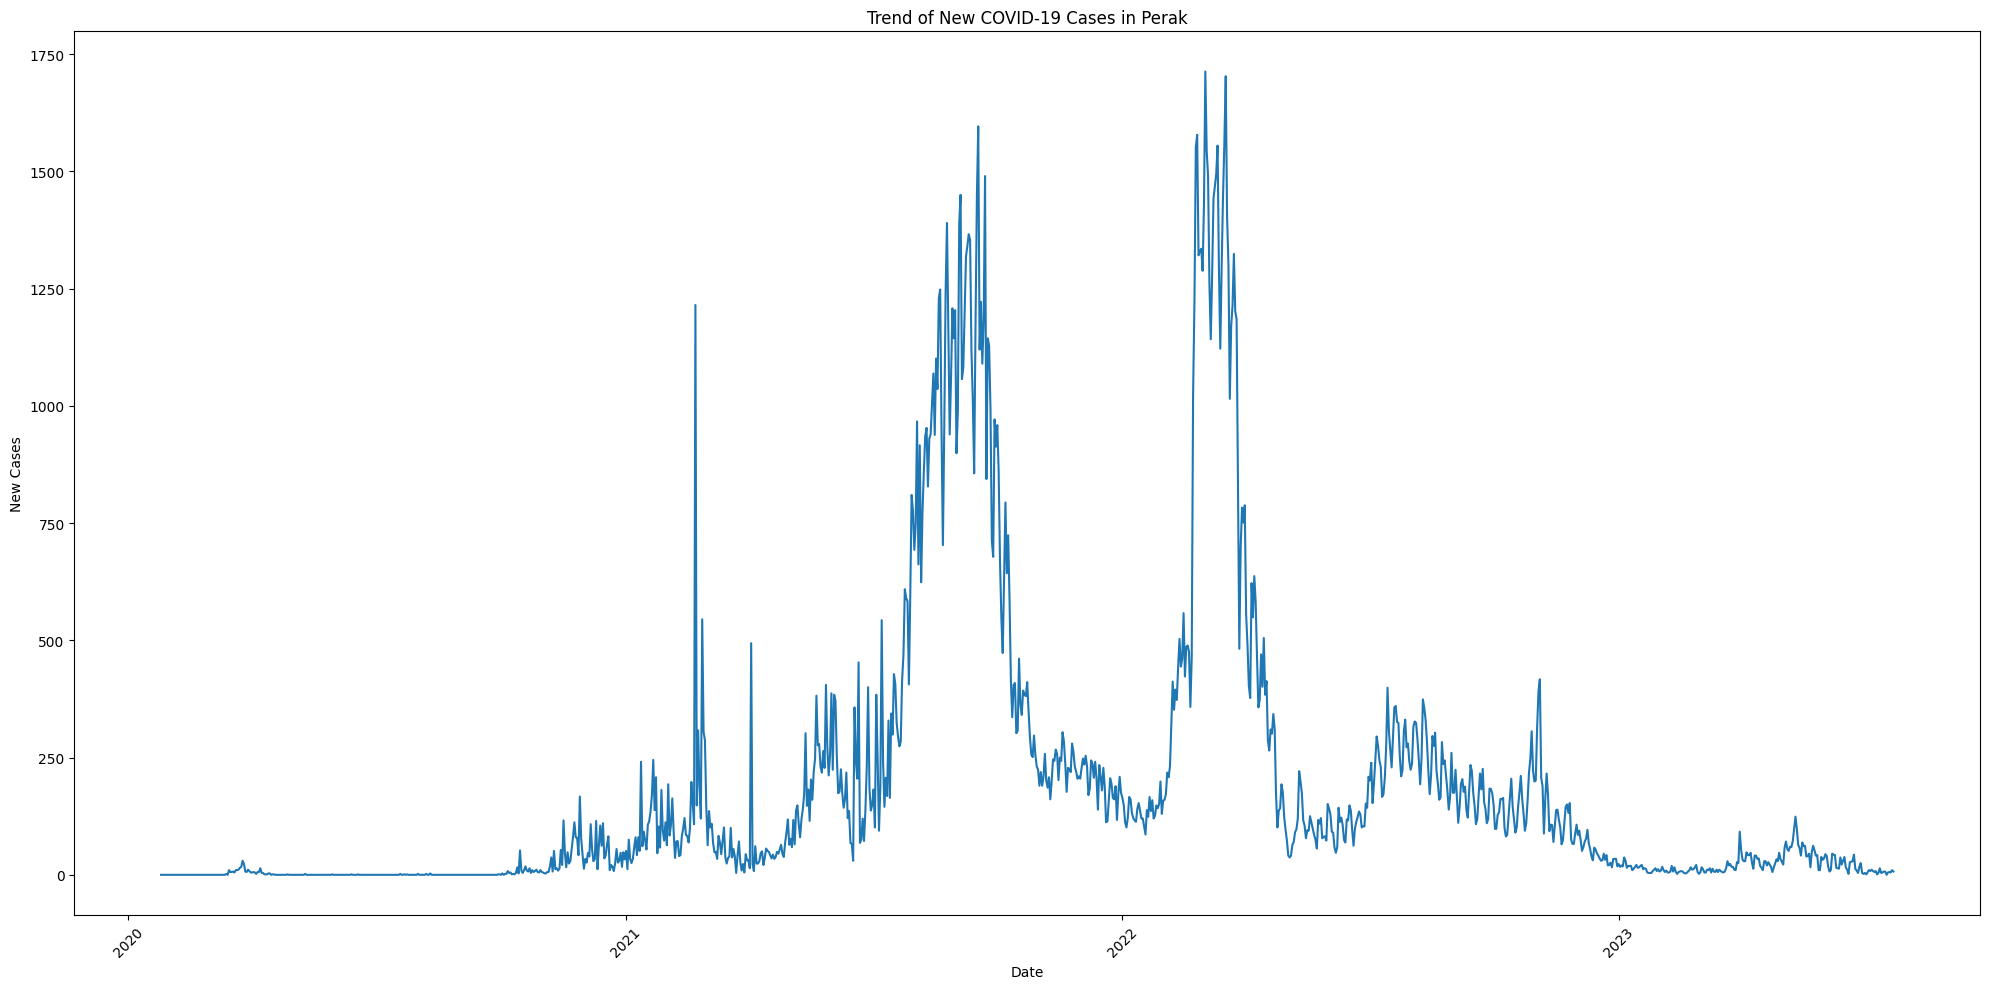

In [2]:
# plt graphy input the state name u want

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV_FILE to the CSV file
CSV_FILE = 'casesstate.csv'

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(CSV_FILE)
state_name = input('input state: ').capitalize()

# Filter the data to get only the rows corresponding to state_data
state_data = df[df['state'] == state_name]

# Convert the date column to datetime format for better x-axis representation
state_data.loc[:, 'date'] = pd.to_datetime(state_data['date'])

# Get the new cases column for state_new_cases
state_new_cases = state_data['cases_new']

# Plot the graph
plt.figure(figsize=(20, 10))
plt.plot(state_data['date'], state_new_cases)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Trend of New COVID-19 Cases in ' + state_name)

# Set the major locator for years on the x-axis
years = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


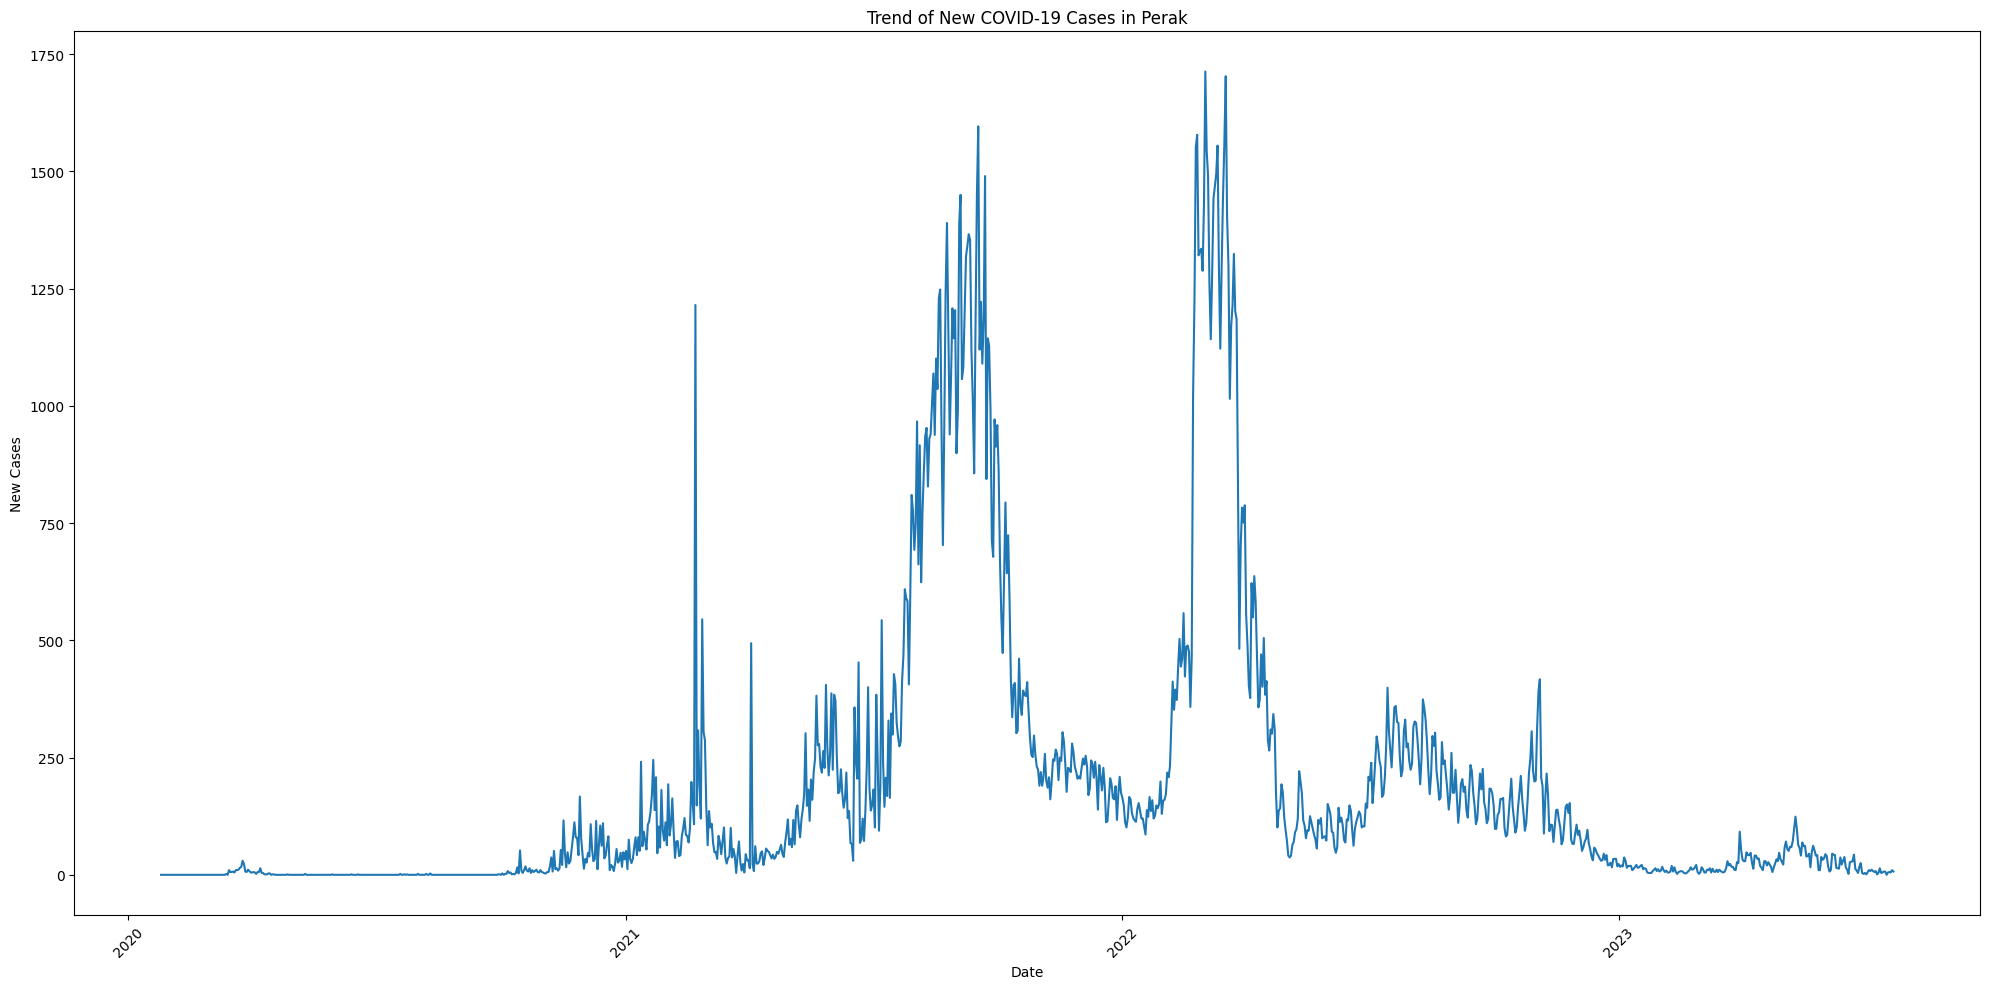

In [3]:
# plt graphy input the month (put all in one month compare) or year(one state compair) or if not display a state then display all state in one graphy

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV_FILE to the CSV file
CSV_FILE = 'casesstate.csv'

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(CSV_FILE)
state_name = input('input state: ').capitalize()

# Filter the data to get only the rows corresponding to state_data
state_data = df[df['state'] == state_name]

# Convert the date column to datetime format for better x-axis representation
state_data.loc[:, 'date'] = pd.to_datetime(state_data['date'])

# Get the new cases column for state_new_cases
state_new_cases = state_data['cases_new']

# Plot the graph
plt.figure(figsize=(20, 10))
plt.plot(state_data['date'], state_new_cases)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Trend of New COVID-19 Cases in ' + state_name)

# Set the major locator for years on the x-axis
years = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# validate input years within the range 2020 to 2023 and are integers, if want exit enter 0
import pandas as pd
import plotly.express as px

CSV_FILE = 'casesstate.csv'
df = pd.read_csv(CSV_FILE)
df['date'] = pd.to_datetime(df['date'])
unique_years = df['date'].dt.year.unique()

def validate_years(years):
    year_list = years.split(",")
    valid_years = []
    invalid_years = []
    
    for year in year_list:
        try:
            year_int = int(year.strip())
            if year_int in unique_years and 2020 <= year_int <= 2023:
                valid_years.append(year_int)
            else:
                invalid_years.append(year)
        except ValueError:
            invalid_years.append(year)
            
    
    return valid_years, invalid_years

while True:
    user_input = input("Enter specific years or leave empty for all years: (enter '0' to exit program)")
    
    if user_input == '0':
        print("Exiting the program.")
        break
    
    if not user_input:
        df_filtered = df
        break
    
    valid_years, invalid_years = validate_years(user_input)
    
    if invalid_years:
        invalid_years_str = ', '.join(invalid_years)
        if invalid_years_str.isdigit():
            print(f"Invalid years: {invalid_years_str}. The years must be within the range 2020 to 2023.")
        else:
            print(f"Invalid years: {invalid_years_str}. Please enter valid integer years within the range 2020 to 2023.")
    else:
        df_filtered = df[df['date'].dt.year.isin(valid_years)]
        break

if user_input != '0':
    fig = px.line(df_filtered, x='date', y='cases_new', color='state', title='Trend of New COVID-19 Cases in Different States')
    fig.update_layout(xaxis_title='Date', yaxis_title='New Cases')
    fig.show()


In [9]:
# find month in specific year
import pandas as pd
import plotly.express as px

CSV_FILE = 'casesstate.csv'
df = pd.read_csv(CSV_FILE)
df['date'] = pd.to_datetime(df['date'])
unique_years = df['date'].dt.year.unique()
unique_months = df['date'].dt.month.unique()

def validate_years_and_months(years_and_months):
    year_month_list = years_and_months.split(",")
    valid_year_months = []
    invalid_year_months = []
    
    for year_month in year_month_list:
        parts = year_month.strip().split('-')
        
        if len(parts) != 2:
            invalid_year_months.append(year_month)
            continue
        
        year_str, month_str = parts
        try:
            year_int = int(year_str)
            month_int = int(month_str)
            if (
                year_int in unique_years and 2020 <= year_int <= 2023 and
                month_int in unique_months and 1 <= month_int <= 12
            ):
                valid_year_months.append((year_int, month_int))
            else:
                invalid_year_months.append(year_month)
        except ValueError:
            invalid_year_months.append(year_month)
    
    return valid_year_months, invalid_year_months

while True:
    user_input = input("Enter specific years and months (yyyy-mm) year (2020-2023) month (1-12) or leave empty for all dates: (enter '0' to exit program)")
    
    if user_input == '0':
        print("Exiting the program.")
        break
    
    if not user_input:
        df_filtered = df
        break
    
    valid_year_months, invalid_year_months = validate_years_and_months(user_input)
    
    if invalid_year_months:
        invalid_year_months_str = ', '.join(invalid_year_months)
        print(f"Invalid years and months: {invalid_year_months_str}. Please enter valid year-month combinations.")
    else:
        df_filtered = df[
            (df['date'].dt.year.isin([year for year, _ in valid_year_months])) &
            (df['date'].dt.month.isin([month for _, month in valid_year_months]))
        ]
        break

if user_input != '0':
    fig = px.line(
        df_filtered,
        x='date',
        y='cases_new',
        color='state',
        title='Trend of New COVID-19 Cases in Different States by Year-Month'
    )
    fig.update_layout(xaxis_title='Date', yaxis_title='New Cases')
    fig.show()
